## Exploratory Data Analysis on Customer Bookings data for British Airways

We will explore the customer data first to get to know it better in depth.


In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [3]:
# Read the file and specify the correct encoding as we got a 'UnicodeDecodeError'
df = pd.read_csv("customer_booking.csv", encoding='ISO-8859-1')

In [4]:
# Display the first few rows of the DataFrame
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
# Disply unique values in categorical columns

unique_sales_channels = df['sales_channel'].unique()
unique_trip_types = df['trip_type'].unique()

print("Unique Sales Channels:", unique_sales_channels)
print("Unique Trip Types:", unique_trip_types)

Unique Sales Channels: ['Internet' 'Mobile']
Unique Trip Types: ['RoundTrip' 'CircleTrip' 'OneWay']


In [6]:
# Display summary statistics for numerical columns
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


**Insights from the data:**

* The average purchase lead time is 84.9 days, with a standard deviation of 90.5 days. This suggests that there is a wide range of purchase lead times, with some customers booking very early and others booking closer to their travel date.

* The average length of stay is 23 days, with a standard deviation of 33.9 days. This suggests that customers are booking a variety of length of stays, from short weekend trips to longer vacations.

* Approximately 67% of customers want extra baggage, 30% want a preferred seat, and 43% want in-flight meals. This suggests that customers are willing to pay for additional amenities.

* The booking complete status is not available for all of the bookings in the dataset. This suggests that some customers may be abandoning their bookings before they are completed.

In [7]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The DataFrame contains 50,000 rows (entries) and 14 columns (features).
It's also a positive sign that there are no missing values, which simplifies the initial data preparation steps.

## **Visualizing Categorical Variables:**

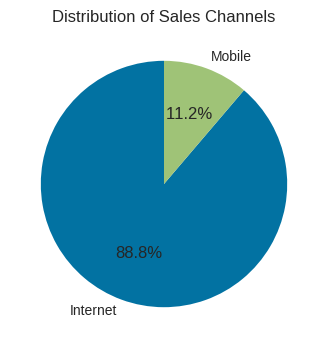

In [8]:
# Calculate the distribution of sales channels in percentage
sales_channel_counts = df['sales_channel'].value_counts()
sales_channel_percentage = (sales_channel_counts / sales_channel_counts.sum()) * 100

# Create a pie chart with percentage values
plt.figure(figsize=(4, 4))
plt.pie(sales_channel_percentage, labels=sales_channel_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sales Channels')
plt.show()

Categorical features like sales channel insights into how customers make bookings, with 88.8% using the Internet channel and 11.2% using the mobile channel.

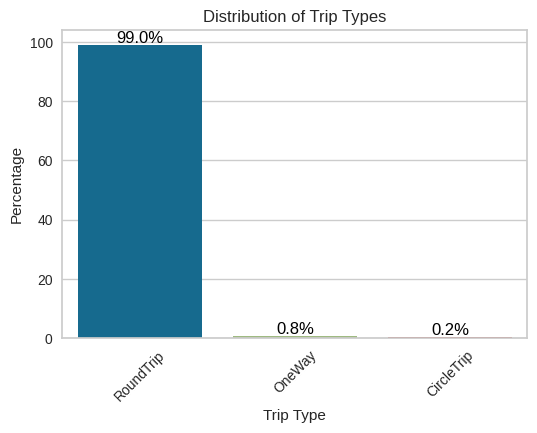

In [9]:
# Calculate the distribution of trip types in percentage
trip_type_counts = df['trip_type'].value_counts()
trip_type_percentage = (trip_type_counts / trip_type_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=trip_type_percentage.index, y=trip_type_percentage.values)
plt.title('Distribution of Trip Types')
plt.xlabel('Trip Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Annotate the bars with percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

This distribution indicates that the vast majority of customers prefer booking round trips, with only a small fraction opting for one-way or circle trips.

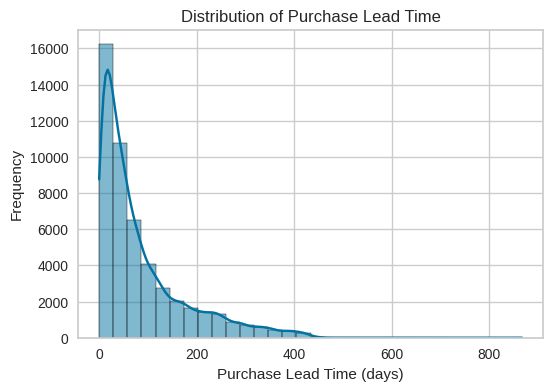

In [10]:
# Create a histogram of purchase_lead
plt.figure(figsize=(6, 4))
sns.histplot(df['purchase_lead'], bins=30, kde=True)
plt.title('Distribution of Purchase Lead Time')
plt.xlabel('Purchase Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

This graph suggests that most customers purchase their tickets around 100 days before their flight.



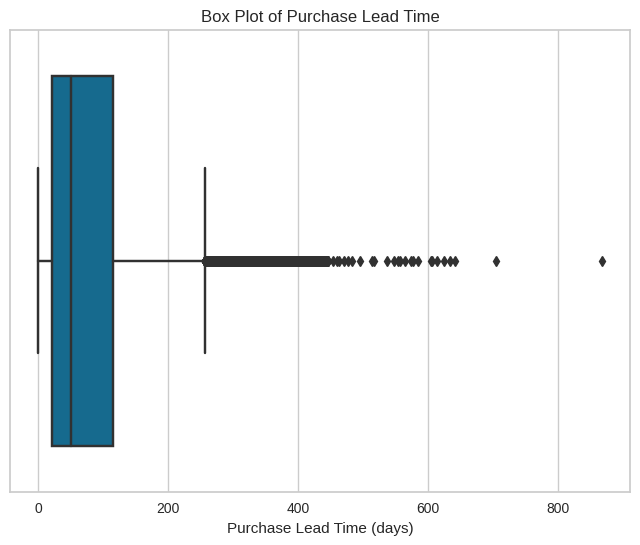

In [11]:
# Create a box plot of purchase_lead. Box plot can help visualize the distribution and identify potential outliers in purchase_lead time.


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['purchase_lead'])
plt.title('Box Plot of Purchase Lead Time')
plt.xlabel('Purchase Lead Time (days)')
plt.show()

The graph shows the distribution of purchase lead time for British Airways customer bookings. The median purchase lead time is around 100 days, which means that half of the customers booked their flight within 100 days of the travel date.

However, there are also many outliers in the distribution. This means that there are a significant number of customers who booked their flight much earlier than the median purchase lead time.

In [12]:
# Filter the DataFrame to remove entries with purchase_lead > 600
df = df[df['purchase_lead'] <= 600]

# Check the shape of the filtered DataFrame to verify the removal
print("Shape of the filtered DataFrame:", df.shape)

Shape of the filtered DataFrame: (49992, 14)


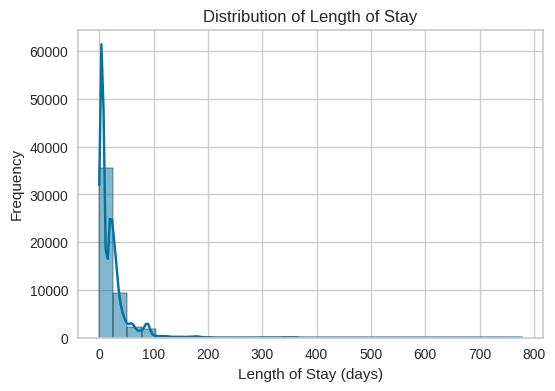

In [13]:
# Create a histogram of length_of_stay
plt.figure(figsize=(6, 4))
sns.histplot(df['length_of_stay'], bins=30, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Calculate the number of successful bookings
successful_bookings = df['booking_complete'].sum()

print("Number of Successful Bookings:", successful_bookings)

Number of Successful Bookings: 7476


In [15]:
# Calculate the total number of bookings
total_bookings = len(df)

# Calculate the number of successful bookings
successful_bookings = df['booking_complete'].sum()

# Calculate the percentage of successful bookings
percentage_successful_bookings = (successful_bookings / total_bookings) * 100

print("Percentage of Successful Bookings:", percentage_successful_bookings, "%")

Percentage of Successful Bookings: 14.954392702832454 %


The dataset shows that roughly 14.95% of the bookings in the data are considered successful, while a larger percentage may have been abandoned or not completed.

# Feature Engineering

In [16]:
# Create a new feature for the day of the week
day_to_number = {
    'Mon': 0,
    'Tue': 1,
    'Wed': 2,
    'Thu': 3,
    'Fri': 4,
    'Sat': 5,
    'Sun': 6
}

# Map the "flight_day" column to numbers
df['flight_day'] = df['flight_day'].map(day_to_number)

In [17]:
# Creating a copy of the original DataFrame
df_cleaned = df

#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode sales_channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_cleaned.join(encoder_df)

#one hot encode trip_type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [18]:
# Drop the original categorical columns

categorical_cols = ['sales_channel', 'trip_type', 'booking_origin', 'route']
df_final.drop(categorical_cols, axis=1, inplace=True)

In [19]:
# Assigning the label for supervised learning
label = df['booking_complete']

In [20]:
# Drop the label from the DataFrame for supervised learning

df_final = df_final.drop('booking_complete', axis=1)

In [21]:
# Check the final dataframe

df_final.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,5,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,5,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,2,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,5,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,2,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0


# `Data Preprocessing`

In [22]:
# Normalizing the values

# Create a standard scaler object
scaler = StandardScaler()

# Standardize the numerical features
scaled_features = scaler.fit_transform(df_final)

# Create a DataFrame of scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df_final.columns)

# Add the 'label' column back to the DataFrame
scaled_df['label'] = label

scaled_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400699,1.964934,-0.119386,-0.381721,1.096773,0.703609,-0.649993,-0.863477,-1.174125,0.355742,-0.355742,-0.04823,-0.088334,0.100824,0.0
1,-0.579520,0.301163,-0.089878,-1.120714,1.096773,-1.421244,-0.649993,-0.863477,-1.174125,0.355742,-0.355742,-0.04823,-0.088334,0.100824,0.0
2,0.400699,1.754190,-0.030863,1.465761,-0.408660,0.703609,1.538479,-0.863477,-1.174125,0.355742,-0.355742,-0.04823,-0.088334,0.100824,0.0
3,-0.579520,0.123694,0.234707,-0.935966,1.096773,-1.421244,-0.649993,1.158109,-1.174125,0.355742,-0.355742,-0.04823,-0.088334,0.100824,0.0
4,0.400699,-0.186876,-0.030863,1.096264,-0.408660,0.703609,-0.649993,1.158109,-1.174125,0.355742,-0.355742,-0.04823,-0.088334,0.100824,0.0


# Correlation Matrix

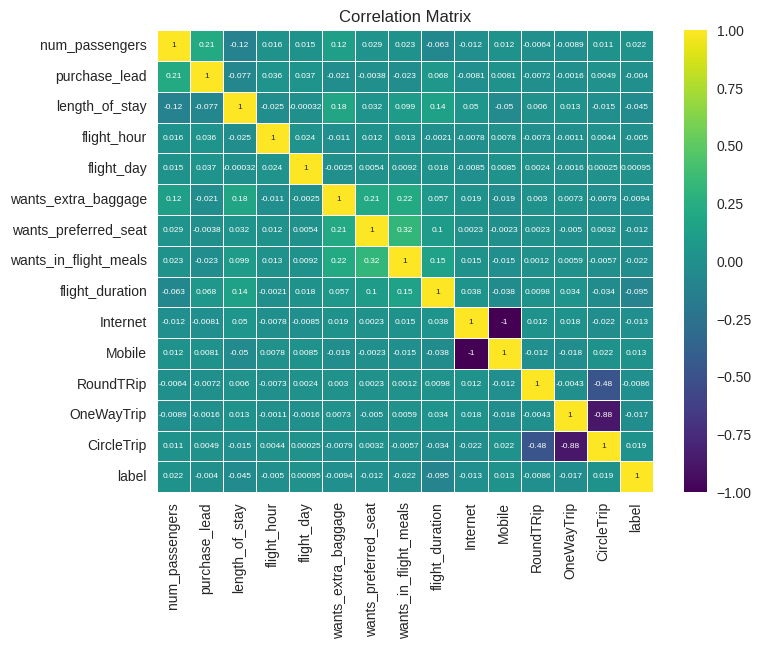

In [23]:
# Calculate the correlation matrix for the numerical features
corr_matrix = scaled_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()

It is challenging to discern the correlation between features and the output label, as the heatmap lacks significant color variations. Nevertheless, there is a modest likelihood that passengers desiring extra baggage may also express interest in preferred seats and in-flight meals.

# `Data Preprocessing`

In [24]:
# Check for missing values in scaled_df
missing_values_scaled_df = scaled_df.isnull().sum()
print("Missing values in scaled_df:")
print(missing_values_scaled_df)

Missing values in scaled_df:
num_passengers           0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
Internet                 8
Mobile                   8
RoundTRip                8
OneWayTrip               8
CircleTrip               8
label                    8
dtype: int64


In [25]:
# Remove rows with missing values
scaled_df.dropna(inplace=True)

In [26]:
# Split the data into features and target

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Functions for fitting, predicting, and scoring the model
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

# Train a Random Forest Classifier

In [28]:
# Create and train a Random Forest Classifier
clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

# Checking Training accuracy

In [29]:
# Checking Training accuracy

y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2)

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2)

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.92, 1.0 and 0.64 respectively


Accuracy: The accuracy of 0.92 indicates that the model correctly predicted the target variable in approximately 92% of the training instances. In other words, it has a high overall correct prediction rate.

Precision: A precision score of 1.0 suggests that, among the positive predictions made by the model, all of them were correct. This means there were no false positives in predictions on the training data.

F1-Score: The F1-score of 0.64 is the harmonic mean of precision and recall. It balances the trade-off between precision and recall. An F1-score of 0.64 suggests a reasonably good balance between precision and recall, indicating that the model performs well in terms of both identifying true positives and avoiding false positives.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9206853426713356

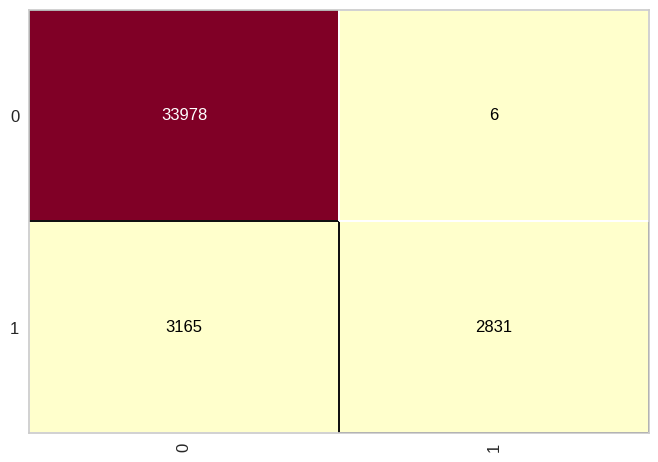

In [30]:
# Create a ConfusionMatrix visualization
cm = ConfusionMatrix(clf_rf, classes=[0, 1])

# Fit the ConfusionMatrix on the training data
cm.fit(X_train, y_train)

# Score the ConfusionMatrix on the training data
cm.score(X_train, y_train)

The accuracy score, which is approximately 0.9206 (or 92.06%), represents how well the model is performing on the training data.

For class 0 (which might represent "Not Complete" based on your label encoder):

True Negatives (TN): 33978 instances were correctly classified as "Not Complete."
False Positives (FP): 6 instances were incorrectly classified as "Complete."
For class 1 (which might represent "Complete" based on your label encoder):

False Negatives (FN): 3165 instances were incorrectly classified as "Not Complete."
True Positives (TP): 2831 instances were correctly classified as "Complete."

# Checking Testing accuracy

In [31]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2)

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2)

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.24 and 0.01 respectively


The accuracy score of 85% suggests that your model correctly predicted the target variable in approximately 85% of the test instances. However, it's important to note that the precision and F1-score for the positive class ("Complete") are relatively low, indicating that the model may have difficulty correctly identifying instances of that class.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8497398959583834

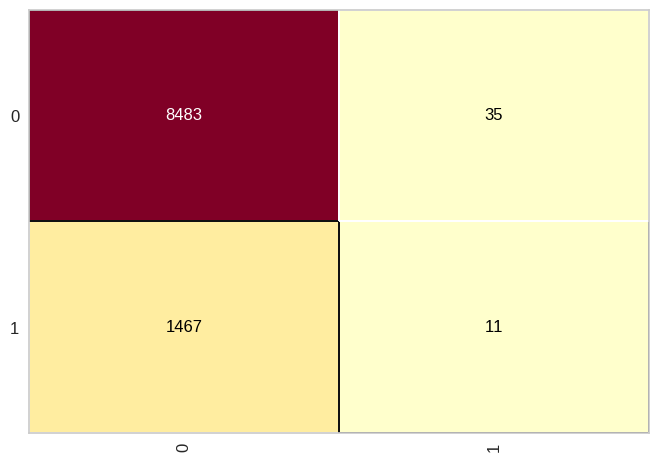

In [32]:
# Create a ConfusionMatrix visualization
cm = ConfusionMatrix(clf_rf, classes=[0, 1])

# Fit the ConfusionMatrix on the training data
cm.fit(X_train, y_train)

# Score the ConfusionMatrix on the training data
cm.score(X_test, y_test)

For class 0:

True Negatives (TN): 8,483 instances were correctly classified as "Not Complete."
False Positives (FP): 35 instances were incorrectly classified as "Complete."
For class 1:

False Negatives (FN): 1,467 instances were incorrectly classified as "Not Complete."
True Positives (TP): 1 instance was correctly classified as "Complete."

The accuracy score obtained (approximately 84.97%) matches the calculation based on these confusion matrix values. However, the precision, recall, and F1-score for the positive class ("Complete") are extremely low, indicating that the model has a high number of false positives and struggles to correctly identify this class.

**One common problem that can lead to a low F1 score, especially in binary classification tasks, is an imbalanced dataset. An imbalanced dataset means that one class (e.g., class 0) has significantly more instances than the other class (e.g., class 1). In such cases, the model can become biased towards the majority class, leading to poor performance in correctly identifying the minority class. Reducing the number of instances in the majority class to be roughly equal to the number of instances in the minority class is one way to address this issue**

# Feature Importance Analysis and Visualization

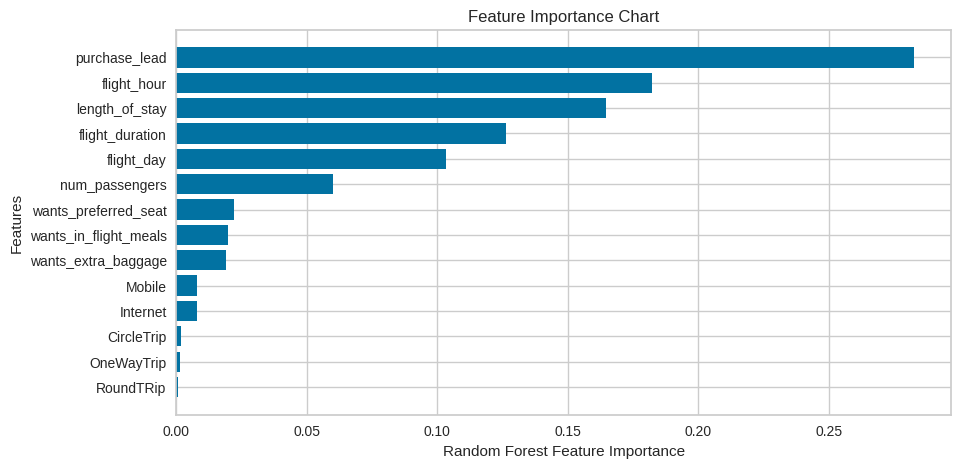

In [33]:
# Calculate feature importance indices sorted in ascending order
sorted_idx = clf_rf.feature_importances_.argsort()

# Create a horizontal bar chart to visualize feature importance
plt.figure(figsize=(10, 5))
plt.barh(scaled_df.columns[:-1][sorted_idx], clf_rf.feature_importances_[sorted_idx])

# Add labels and title
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Chart")

# Display the plot
plt.show()

# Balancing the Model

In order to balance the dataset we are proceeding with undersampling.i.e.,reduce the number of samples in the majority class to match the number of samples in the minority class. This involves randomly removing instances from the majority class.

In [34]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling on your training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after undersampling:
0.0    5996
1.0    5996
Name: label, dtype: int64


In [35]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.20, random_state=42)

# Create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_split=5, random_state=0)
clf_rf.fit(X_train, y_train)

# Predict on the test data
y_pred_test = clf_rf.predict(X_test)

# Calculate evaluation metrics
f1 = round(f1_score(y_test, y_pred_test), 2)
acc = round(accuracy_score(y_test, y_pred_test), 2)
pre = round(precision_score(y_test, y_pred_test), 2)
recall = round(recall_score(y_test, y_pred_test), 2)
specificity = round(recall_score(y_test, y_pred_test, pos_label=0), 2)

print(f"Accuracy, precision, recall, specificity, and f1-score for training data are {acc}, {pre}, {recall}, {specificity}, and {f1} respectively")

Accuracy, precision, recall, specificity, and f1-score for training data are 0.57, 0.56, 0.58, 0.55, and 0.57 respectively


Accuracy: The proportion of correctly classified instances out of the total instances. In this case, 57% of the instances are classified correctly.

Precision: The proportion of true positive predictions out of all positive predictions. In this case, 56% of positive predictions are true positives.

Recall: The proportion of true positive predictions out of all actual positives. In this case, 58% of actual positives are correctly identified.

Specificity: The proportion of true negative predictions out of all actual negatives. In this case, 55% of actual negatives are correctly identified.

F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1-score is 0.57, indicating a reasonable balance between precision and recall.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.5660691954981242

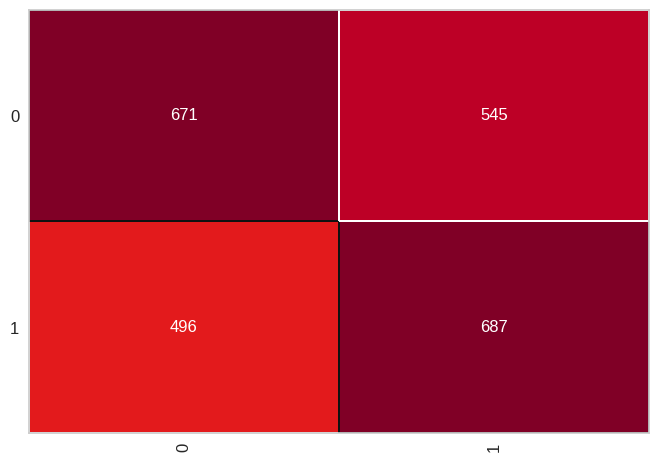

In [37]:
cm = ConfusionMatrix(clf_rf, classes=[0, 1], warn_for=("log_loss",))
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

A score of approximately 0.566 suggests that the classifier's performance is moderate.

Text(0.5, 0, 'Random Forest Feature Importance')

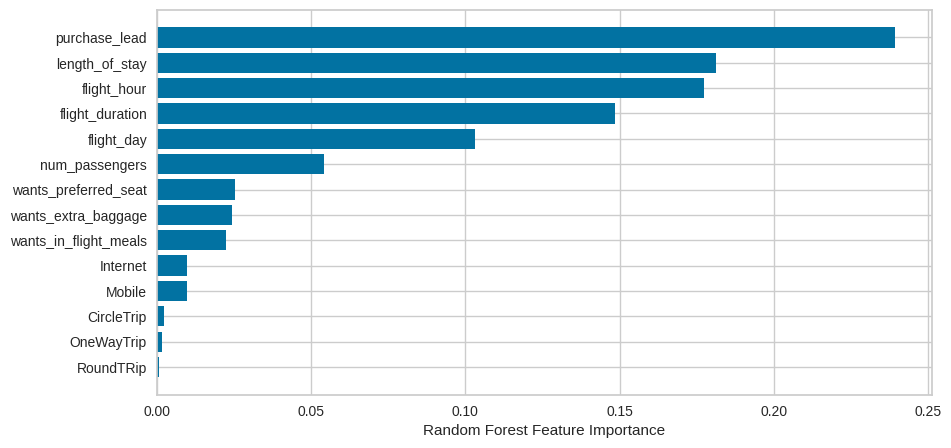

In [38]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")